## Q1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target

y = y.astype(int)

print(f"Dataset loaded. Shape: {X.shape}")


Dataset loaded. Shape: (70000, 784)


In [3]:
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Initializing SVM model (Kernel: Linear)...")
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)
print("Training complete.")


Initializing SVM model (Kernel: Linear)...
Training complete.


Predicting on test set...

Accuracy: 93.51%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.91      0.92      0.92      1380
           3       0.91      0.92      0.92      1433
           4       0.93      0.94      0.94      1295
           5       0.90      0.90      0.90      1273
           6       0.97      0.95      0.96      1396
           7       0.95      0.95      0.95      1503
           8       0.92      0.88      0.90      1357
           9       0.93      0.91      0.92      1420

    accuracy                           0.94     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.94      0.94      0.94     14000


Confusion Matrix:
[[1310    1    4    0    3   11    7    1    5    1]
 [   0 1571    3    8    1    4    0    5    5    3]
 [   8   16 1273   14   14    4   12    6   27  

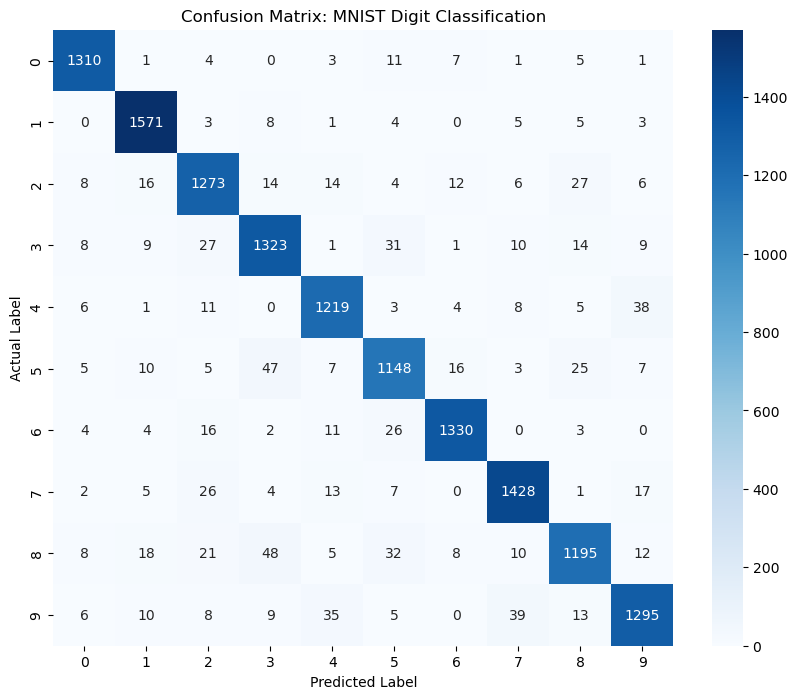

In [ ]:
print("Predicting on test set...")
y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: MNIST Digit Classification')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Q2)

In [ ]:
import numpy as np
import pandas as pd

classes = [(0,9),(10,19),(20,29),(30,39),(40,49),(50,59),(60,69),(70,79),(80,89)]
frequency = np.array([20,21,23,16,11,10,7,3,1])

midpoints = np.array([(c[0] + c[1]) / 2 for c in classes])

estimated_mean = np.sum(midpoints * frequency) / np.sum(frequency)

print("Estimated Mean:", estimated_mean)

N = np.sum(frequency)
cum_freq = np.cumsum(frequency)

median_class_index = np.where(cum_freq >= N/2)[0][0]

L = classes[median_class_index][0] - 0.5   # lower class boundary
B = cum_freq[median_class_index - 1] if median_class_index > 0 else 0
G = frequency[median_class_index]
w = classes[median_class_index][1] - classes[median_class_index][0] + 1

estimated_median = L + ((N/2 - B) / G) * w

print("Estimated Median:", estimated_median)

modal_class_index = np.argmax(frequency)

L_mode = classes[modal_class_index][0] - 0.5
f_m = frequency[modal_class_index]
f_m1 = frequency[modal_class_index - 1]
f_m2 = frequency[modal_class_index + 1]
w = classes[modal_class_index][1] - classes[modal_class_index][0] + 1

estimated_mode = L_mode + ((f_m - f_m1) / ((f_m - f_m1) + (f_m - f_m2))) * w

print("Estimated Mode:", estimated_mode)


Estimated Mean: 29.5
Estimated Median: 26.02173913043478
Estimated Mode: 21.72222222222222


## Q3)

In [7]:
import math

sample_size = 200
std_dev = 180

standard_error = std_dev / math.sqrt(sample_size)

print("Standard Error:", standard_error)


Standard Error: 12.727922061357855


## Q4)

In [ ]:
import numpy as np

data = np.array([12, 23, 31, 15, 26, 24, 16, 23])

mean_value = np.mean(data)

absolute_distances = np.abs(data - mean_value)

average_distance = np.mean(absolute_distances)

print("Mean:", mean_value)
print("Average distance from mean:", average_distance)


Mean: 21.25
Average distance from mean: 5.1875


## Q5)

In [ ]:
import numpy as np
import pandas as pd
import math

classes = [(2,4), (4,6), (6,8), (8,10)]
frequency = np.array([16, 13, 7, 5])

midpoints = np.array([(c[0] + c[1]) / 2 for c in classes])

df = pd.DataFrame({
    "Class Interval": ["2-4", "4-6", "6-8", "8-10"],
    "Frequency": frequency,
    "Midpoint": midpoints
})

print("Grouped Frequency Table:")
print(df)
print("\n")

N = np.sum(frequency)
mean = np.sum(frequency * midpoints) / N
print("Mean:", mean)

cum_freq = np.cumsum(frequency)

median_class_index = np.where(cum_freq >= N/2)[0][0]

L = classes[median_class_index][0]    
B = cum_freq[median_class_index - 1] if median_class_index > 0 else 0
G = frequency[median_class_index]
w = classes[median_class_index][1] - classes[median_class_index][0]

median = L + ((N/2 - B) / G) * w
print("Median:", median)

modal_class_index = np.argmax(frequency)

L_mode = classes[modal_class_index][0]
f_m = frequency[modal_class_index]
f_m1 = frequency[modal_class_index - 1] if modal_class_index > 0 else 0
f_m2 = frequency[modal_class_index + 1] if modal_class_index < len(frequency)-1 else 0
w = classes[modal_class_index][1] - classes[modal_class_index][0]

mode = L_mode + ((f_m - f_m1) / ((f_m - f_m1) + (f_m - f_m2))) * w
print("Mode:", mode)

variance = np.sum(frequency * (midpoints - mean)**2) / N
std_dev = math.sqrt(variance)
print("Standard Deviation:", std_dev)

skewness_mean_mode = (mean - mode) / std_dev
skewness_mean_median = (3 * (mean - median)) / std_dev

print("\nSkewness (Mean - Mode method):", skewness_mean_mode)
print("Skewness (Mean - Median method):", skewness_mean_median)


Grouped Frequency Table:
  Class Interval  Frequency  Midpoint
0            2-4         16       3.0
1            4-6         13       5.0
2            6-8          7       7.0
3           8-10          5       9.0


Mean: 5.048780487804878
Median: 4.6923076923076925
Mode: 3.6842105263157894
Standard Deviation: 2.0476187182258885

Skewness (Mean - Mode method): 0.6664179953733713
Skewness (Mean - Median method): 0.5222741797448157


## Q6)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

length_bream = np.array([25.4, 26.3, 26.5, 29.0, 29.7, 37.0]).reshape(-1,1)
weight_bream = np.array([242, 290, 340, 363, 500, 1000])

length_roach = np.array([23.5, 25.2, 26.0, 31.7, 22.5, 20.8, 14.5]).reshape(-1,1)
weight_roach = np.array([200, 180, 290, 390, 160, 140, 40])

model_bream = LinearRegression()
model_bream.fit(length_bream, weight_bream)

model_roach = LinearRegression()
model_roach.fit(length_roach, weight_roach)

print("Bream Regression Model:")
print("Slope (b):", model_bream.coef_[0])
print("Intercept (a):", model_bream.intercept_)

print("\nRoach Regression Model:")
print("Slope (b):", model_roach.coef_[0])
print("Intercept (a):", model_roach.intercept_)


Bream Regression Model:
Slope (b): 64.74877731577308
Intercept (a): -1420.80206253549

Roach Regression Model:
Slope (b): 20.469989651604
Intercept (a): -280.16747154191097
